<a href="https://colab.research.google.com/github/123-VARSHA/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Copy_of_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Defining the file path
df = pd.read_csv('/content/drive/MyDrive/ML_Classification Capstone/Coronavirus Tweets 1.csv')

##Data Inspection

In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂ’s getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [7]:
df.shape

(41157, 6)

In [8]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [10]:
# find the null values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [11]:
# drop null values
df.dropna(inplace=True)
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [12]:
df.shape

(32567, 6)

# Exploratory Data Analysis

In [13]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [14]:
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [15]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


##Graphical Representation of Sentiment Column

Text(0, 0.5, 'count')

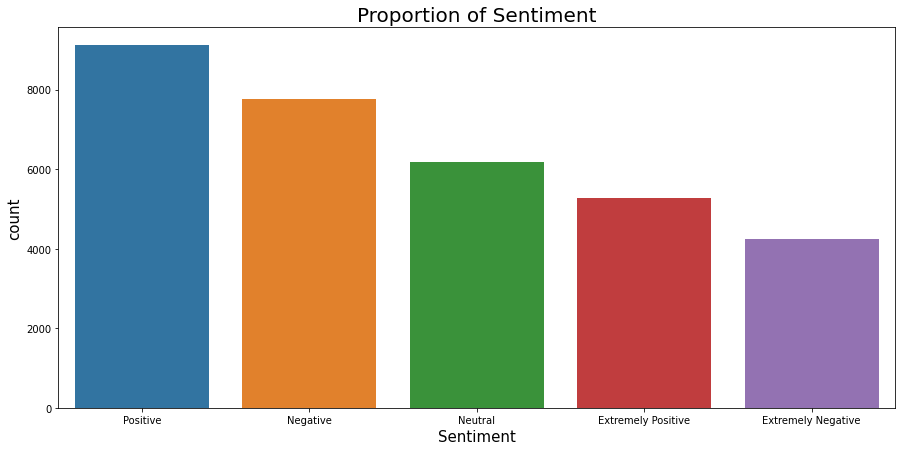

In [16]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=15)
ax.set_ylabel('count', fontsize=15)

##Unique values in each column

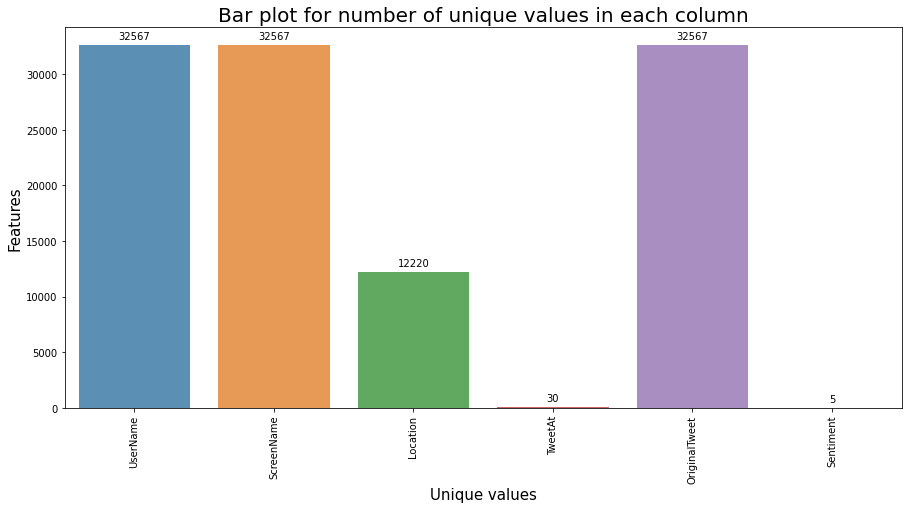

In [17]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique = []
for i in df.columns :
  unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches :
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column', fontsize=20)
plt.xlabel('Unique values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

## Countplot for original tweet according to TweetAt column

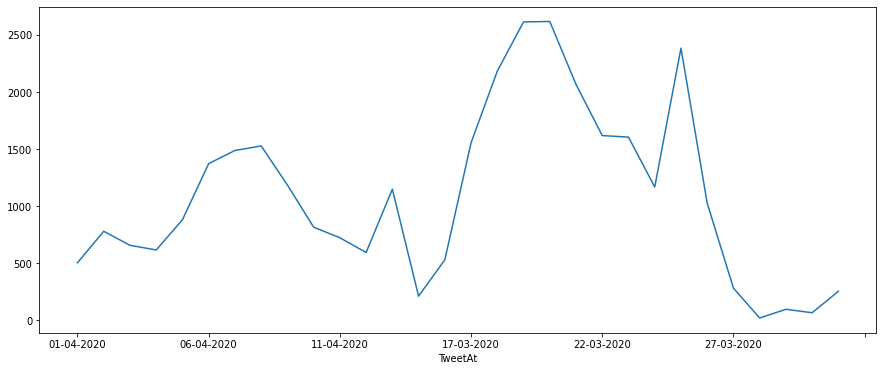

In [18]:
plt.figure(figsize=(15,6))
grp_tweet = df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

##Histogram Plot of OriginalTweet

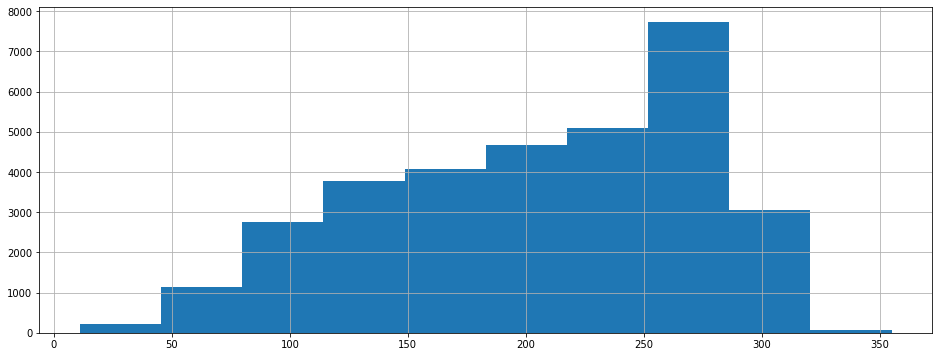

In [19]:
plt.figure(figsize=(16,6))
plt.grid()
plt.hist(df['OriginalTweet'].str.len())
plt.show()

##Top 10 Locations

In [20]:
top10_location = df['Location'].value_counts().sort_values(ascending = False)[:10]
top10_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

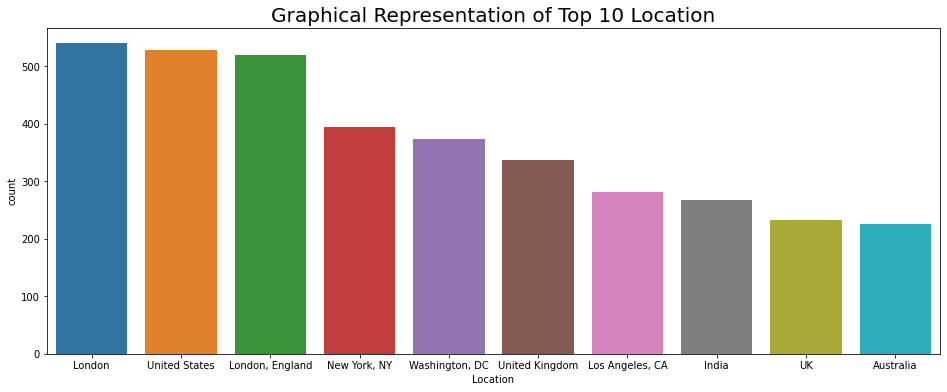

In [21]:
plt.figure(figsize=(16,6))
plt.title('Graphical Representation of Top 10 Location', fontsize = 20)
sns.countplot(data = df[df['Location'].isin(top10_location.index)], x='Location', order=top10_location.index)

In [22]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [23]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


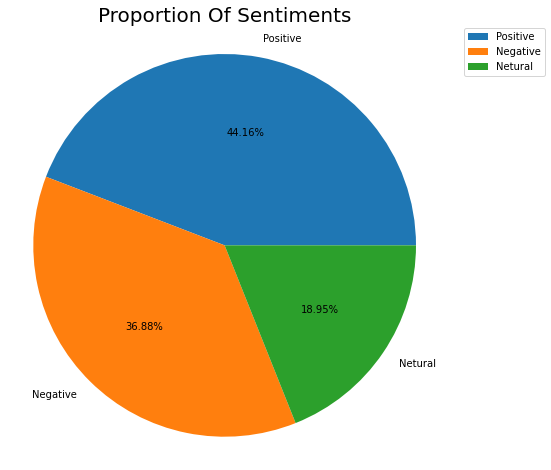

In [24]:
# Plotting the histogram for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##Train - Test Split

In [32]:
# specify input and output attributes
x = df.OriginalTweet
y = df.Sentiment
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

##Model Training

In [33]:
tvec = TfidfVectorizer()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24425,), (24425,), (8142,), (8142,))

##Model1 - LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
model1 = Pipeline([('vectorizer', tvec), ('classifier', LR)])
model1.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [37]:
# model prediction
y_pred_LR = model1.predict(x_test)

##Model2 - 

##Performance Metrics and Accuracy

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Performance of Logistic Regression Model

In [39]:
print('Accuracy : ', accuracy_score(y_pred_LR, y_test))
print('Precision : ', precision_score(y_pred_LR, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_LR, y_test, average = 'weighted'))

Accuracy :  0.7682387619749448
Precision :  0.7883874928719254
Recall :  0.7682387619749448


Performance of 

##Confusion Metrics